<a href="https://colab.research.google.com/github/Strix9289/Introduction-of-Deep-Learning/blob/master/Compare_MLP_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNNとMPLの比較

In [ ]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


#### データセットの読み込み

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

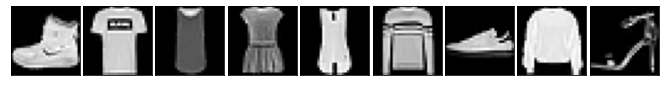

In [ ]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

# MLP実装

In [ ]:
# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) /255

# 出力結果をone-hot表現に変換します。
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [ ]:
#Sequential():層を直列につなぐシンプルなモデル
model_MLP = Sequential()

#np.shapeはtapple型で表記され、tppleでは、要素が一つの時、(x,)と書かなくてはいけない
model_MLP.add(Dense(units=256,activation='relu', input_shape=(784,))) # 次元の変化: 784 -> 256
model_MLP.add(Dense(units=100,activation='relu')) # 次元の変化: 256 -> 100
model_MLP.add(Dense(units=10,activation='softmax')) # 次元の変化: 100 -> 10


model_MLP.compile(
    loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

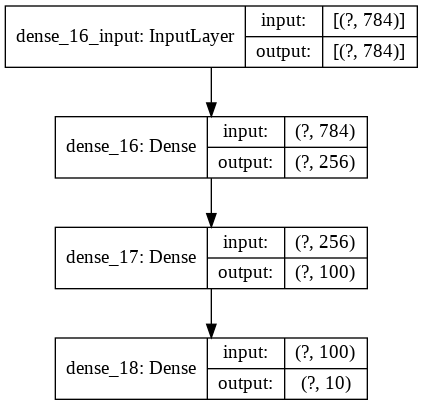

In [ ]:
# モデル構造の可視化
from keras.utils import plot_model
plot_model(model_MLP, show_shapes=True,)

In [ ]:
early_stopping = EarlyStopping(patience=1, verbose=1)
history_MLP=model_MLP.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1,
            validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 2s 5ms/step - loss: 1.0576 - accuracy: 0.6753 - val_loss: 0.7246 - val_accuracy: 0.7546
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.6358 - accuracy: 0.7940 - val_loss: 0.6058 - val_accuracy: 0.7956
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5521 - accuracy: 0.8169 - val_loss: 0.5520 - val_accuracy: 0.8117
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5098 - accuracy: 0.8287 - val_loss: 0.5339 - val_accuracy: 0.8124
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4827 - accuracy: 0.8356 - val_loss: 0.5068 - val_accuracy: 0.8234
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4641 - accuracy: 0.8411 - val_loss: 0.4833 - val_accuracy: 0.8335
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.4505 - accuracy: 0.8447 - val_loss: 0.4777 - val_accuracy: 0.8297

In [ ]:
#最終正解率
history_MLP.history["val_accuracy"][-1]*100

83.64999890327454

10    0.8365
Name: val_accuracy, dtype: float64

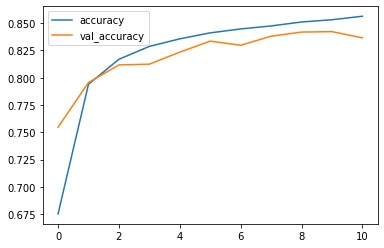

In [ ]:
# 正解率
result_MLP=pd.DataFrame(history_MLP.history)
result_MLP[["accuracy", "val_accuracy"]].plot()

# CNN実装

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

多層パーセプトロンでは入力を (バッチサイズ、画素数) の2次元テンソルとして扱いましたが、 CNNでは2次元の画像として処理していくために4次元テンソル (バッチサイズ、縦の画素数、横の画素数、チャンネル数)として扱います。 チャンネル数は白黒画像の場合は1、 カラー画像の場合はRGBで3です。

Fashion MNISTの画像は白黒データですのでチャンネル数を1に設定しています。(カラー画像の場合はチャンネル数が3になります)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [ ]:
model_CNN = Sequential()

# 入力画像 28x28x1 (縦の画素数)x(横の画素数)x(チャンネル数)
model_CNN.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(28, 28, 1)))  # 28x28x1 -> 24x24x16
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))  # 24x24x16 -> 12x12x16
model_CNN.add(Conv2D(64, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 12x12x16 -> 8x8x64
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))  # 8x8x64 -> 4x4x64

model_CNN.add(Flatten())  # 4x4x64-> 1024
model_CNN.add(Dense(10, activation='softmax'))  # 1024 -> 10

model_CNN.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

作成したモデルを確認してみましょう。

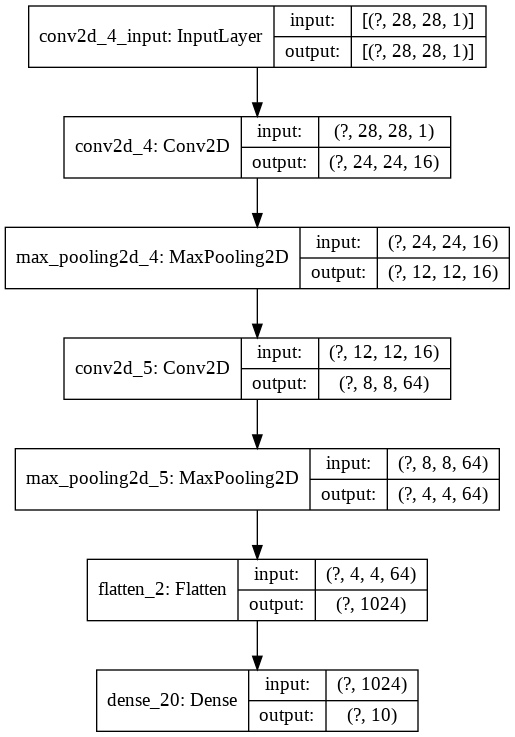

In [ ]:
# モデル構造の可視化
from keras.utils import plot_model
plot_model(model_CNN, show_shapes=True)

In [ ]:
early_stopping = EarlyStopping(patience=1, verbose=1)
history_CNN=model_CNN.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1,
            validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
469/469 [==============================] - 36s 78ms/step - loss: 0.5463 - accuracy: 0.8051 - val_loss: 0.4099 - val_accuracy: 0.8541
Epoch 2/100
469/469 [==============================] - 36s 77ms/step - loss: 0.3589 - accuracy: 0.8717 - val_loss: 0.3523 - val_accuracy: 0.8735
Epoch 3/100
469/469 [==============================] - 36s 77ms/step - loss: 0.3105 - accuracy: 0.8889 - val_loss: 0.3209 - val_accuracy: 0.8860
Epoch 4/100
469/469 [==============================] - 36s 77ms/step - loss: 0.2819 - accuracy: 0.8995 - val_loss: 0.3159 - val_accuracy: 0.8825
Epoch 5/100
469/469 [==============================] - 36s 77ms/step - loss: 0.2590 - accuracy: 0.9071 - val_loss: 0.3121 - val_accuracy: 0.8917
Epoch 6/100
469/469 [==============================] - 36s 77ms/step - loss: 0.2438 - accuracy: 0.9125 - val_loss: 0.2906 - val_accuracy: 0.8957
Epoch 7/100
469/469 [==============================] - 36s 77ms/step - loss: 0.2272 - accuracy: 0.9180 - val_loss: 0.2917 - val_ac

In [ ]:
#最終正解率
history_CNN.history["val_accuracy"][-1]*100

89.96999859809875

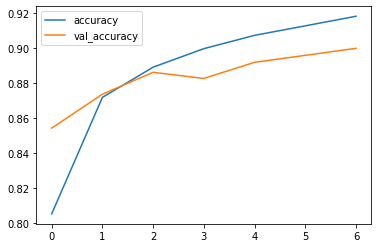

In [ ]:
result_CNN = pd.DataFrame(history_CNN.history)
result_CNN[["accuracy", "val_accuracy"]].plot()